In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D

from tensorflow.keras.callbacks import EarlyStopping

from sklearn.metrics import classification_report, confusion_matrix

In [3]:
# loading the MNIST, hand-written dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print('Trainng data dimension:\nFeature: {}, Target: {}'.format(x_train.shape,y_train.shape))
print('\nTesting data dimension:\nFeature: {}, Target: {}'.format(x_test.shape,y_test.shape))

Trainng data dimension:
Feature: (60000, 28, 28), Target: (60000,)

Testing data dimension:
Feature: (10000, 28, 28), Target: (10000,)


In [4]:
# Rescaling the gray scaled image in the range [0,1]
x_train, x_test = x_train/255, x_test/255

# Required this exact shape in the convolution layer. 
# The last dimension refers to the color channel, 1 for black and while ie gray scaled image
x_train, x_test = x_train.reshape(60000,28,28,1), x_test.reshape(10000,28,28,1)

In [9]:
x_train.shape[1:]

(28, 28, 1)

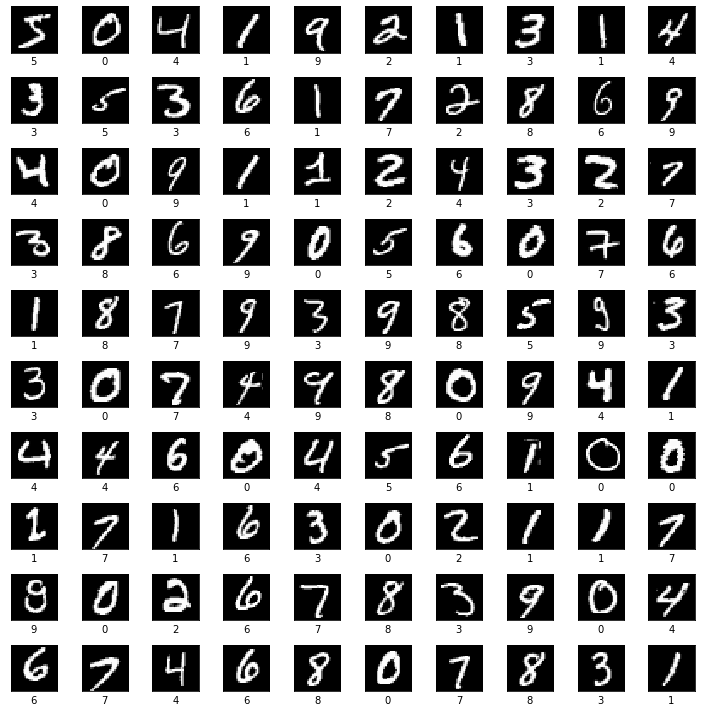

In [13]:
# Displaying some digit images
plt.figure(figsize=(10,10))
for i in range(100):
    plt.subplot(10, 10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(np.squeeze(x_train)[i], cmap='gray')
    plt.xlabel(y_train[i])
plt.tight_layout()
plt.show()

In [14]:
nClass = len(set(y_train))
print('Total  number of classes for classification: {}'.format(nClass))

# Encoding the target classes (categorical target)
y_train_encode = to_categorical(y_train, num_classes=nClass)
y_test_encode = to_categorical(y_test, num_classes=nClass)
y_train_encode

Total  number of classes for classification: 10


array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [15]:
input_image_shape = x_train.shape[1:]
input_image_shape

(28, 28, 1)

## Building the model

In [16]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=input_image_shape, activation='relu',))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=5)

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               589952    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.fit(x_train,y_train_encode,epochs=15,validation_data=(x_test,y_test_encode),callbacks=[early_stop])

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 [==============================] - 70s 1ms/sample - loss: 0.1448 - accuracy: 0.9563 - val_loss: 0.0603 - val_accuracy: 0.9797
Epoch 2/15
60000/60000 [==============================] - 82s 1ms/sample - loss: 0.0493 - accuracy: 0.9852 - val_loss: 0.0459 - val_accuracy: 0.9843
Epoch 3/15
60000/60000 [==============================] - 116s 2ms/sample - loss: 0.0327 - accuracy: 0.9897 - val_loss: 0.0521 - val_accuracy: 0.9830
Epoch 4/15
60000/60000 [==============================] - 112s 2ms/sample - loss: 0.0216 - accuracy: 0.9932 - val_loss: 0.0417 - val_accuracy: 0.9865
Epoch 5/15
60000/60000 [==============================] - 110s 2ms/sample - loss: 0.0157 - accuracy: 0.9950 - val_loss: 0.0501 - val_accuracy: 0.9864
Epoch 6/15
60000/60000 [==============================] - 95s 2ms/sample - loss: 0.0112 - accuracy: 0.9963 - val_loss: 0.0455 - val_accuracy: 0.9873
Epoch 7/15
60000/60000 [=============================

# Evaluate the Model

In [20]:
metric = pd.DataFrame(model.history.history)

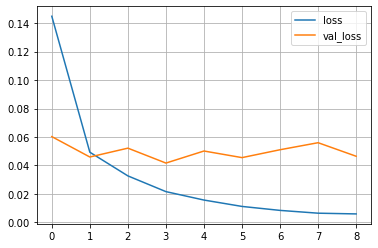

In [32]:
metric[['loss', 'val_loss']].plot(grid=True)

In [27]:
prediction = model.predict_classes(x_test)

In [36]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.98      0.99      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



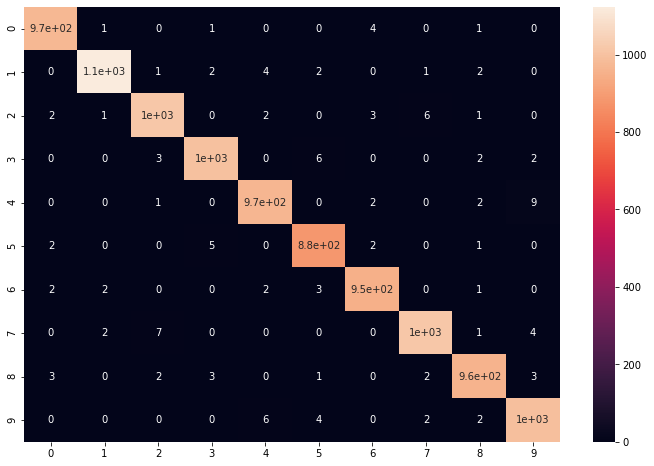

In [38]:
plt.figure(figsize=(12,8))
sns.heatmap(confusion_matrix(y_test, prediction), annot=True)

There are in total 123 misclassified digits. Some of them are,


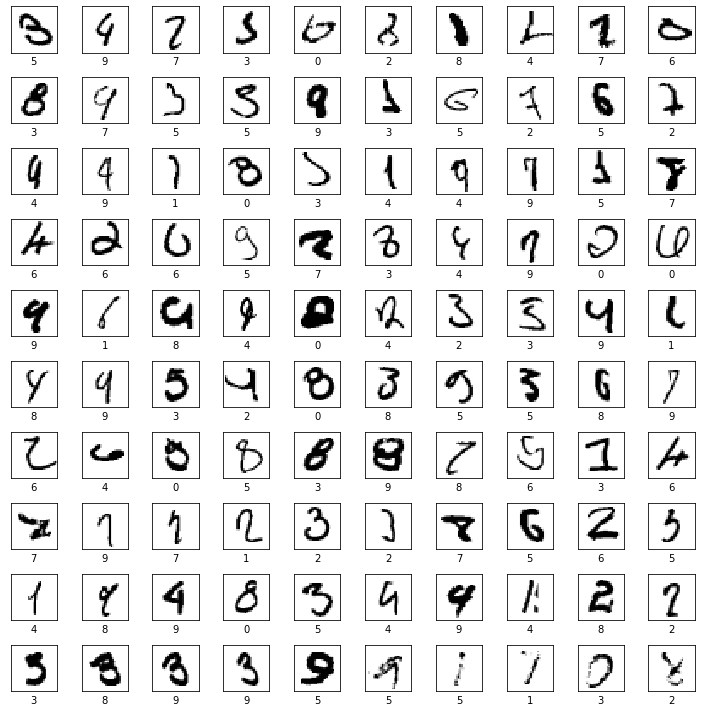

In [29]:
# Some of the misclassified digit images are as follows
_ = list(prediction==y_test)
wrong_index = [i for i, __ in enumerate(_) if not __]
print('There are in total {} misclassified digits. Some of them are,'.format(len(wrong_index)))
plt.figure(figsize=(10,10))
for count, i in enumerate(wrong_index[0:100]):
    plt.subplot(10, 10, count+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(np.squeeze(x_test)[i], cmap=plt.cm.binary)
    plt.xlabel(prediction[i])
plt.tight_layout()
plt.show()